# 使用手写数字集来演示图像的分类任务

In [1]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras import layers
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
import os

## 网络构建模块流程
```
# 网络结构构建器
model = tf.keras.models.Sequential([网络结构])
 # 拉直延伸
tf.keras.layers.Flatten()
# 定义网络：全链接层
tf.keras.layers.Dense(神经元个数, activation=“激活函数”, kernel_regularizer=”正则化方式“)
其中activation可以选择：relu

# 编译模型
model = tf.compile

# 训练
model.fit

# 导出和保存
```

## 1、载入数据
注意数据的维度，特征数据和标签数据的对齐
注意数据的随机化处理，对稀疏性原始数据可以不用随机打乱，这里的图像数据前后并没有太大关联，所以不用随机化
tf.keras.datasets.mnist.load_data 函数在指定路径读取时，路径必须是绝对路径格式，相对路径会报错

In [9]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(path='E:\Code\myMachineLearning\Tensorflow2\Data\mnist.npz')

print('训练集样本的大小:', x_train.shape)
print('训练集标签的大小:', y_train.shape)
print('测试集样本的大小:', x_test.shape)
print('测试集标签的大小:', y_test.shape)
print(x_test[1])

训练集样本的大小: (60000, 28, 28)
训练集标签的大小: (60000,)
测试集样本的大小: (10000, 28, 28)
测试集标签的大小: (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 116 125 171 255 255 150  93   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 169 253 253 253 253 253 253 218  30
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 169 253 253 253 213 142 176 253 253 122
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  52 250 253 210  32  12   0   6 206 253 140
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  77 251 210  25   0   0   0 122 248 253  65
    0   0   0   0

## 2、数据预处理
首先在处理图像数据时，要先进行数据的归一化，这样可以加快网络的收敛速度。
使用数据增强,使用ImageDataGenerator增强后的数据是已经实现了分组可以用于训练的数据，在fit时需要特殊指定情况
```
img_prossess_Gen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale='所有数据乘以这个数（倍乘）',
    horizontal_flip='是否随机水平旋转 Boolean',
    rotation_rang='随机旋转的角度范围 Int',
    width_shift_range='随机宽度偏移量',
    height_shift_range='随机高度便宜量',
    zoom_range='随机缩放的范围 Float or [lower, upper].'
)
```

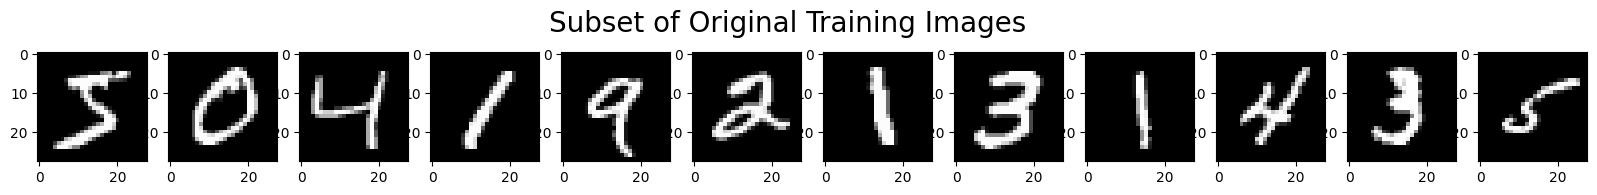

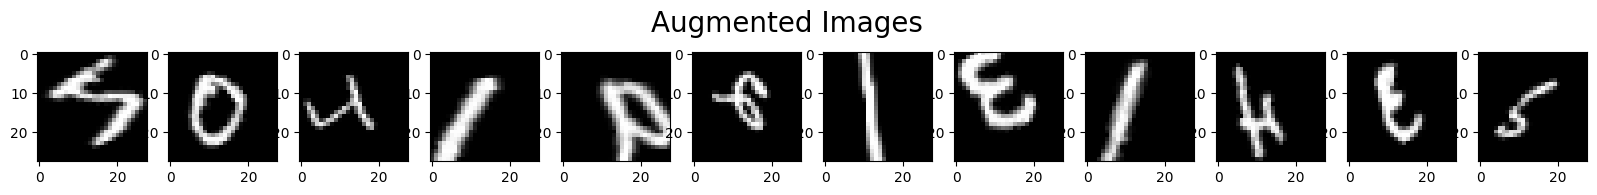

In [3]:
x_train, x_test = x_train/255.0, x_test/255.0   # 灰度图像数据归一化处理

fig = plt.figure(figsize=(20, 2))
plt.set_cmap('gray')
# 显示原始图片
for i in range(0, 12):
    ax = fig.add_subplot(1, 12, i + 1)
    ax.imshow(x_train[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

img_gen = True  # 是否使用数据增强
if img_gen is True:
    x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)  # 数据扩充要求输入的数据是四维
    img_prossess_Gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./1.,
        horizontal_flip=True,
        rotation_range=45,
        width_shift_range=.15,
        height_shift_range=.15,
        zoom_range=0.5
    )
    img_prossess_Gen.fit(x_train)

    # 显示增强后的图片
    fig = plt.figure(figsize=(20, 2))
    for x_batch in img_prossess_Gen.flow(x_train, batch_size=12, shuffle=False):
        for i in range(0, 12):
            ax = fig.add_subplot(1, 12, i + 1)
            ax.imshow(np.squeeze(x_batch[i]))
        fig.suptitle('Augmented Images', fontsize=20)
        plt.show()
        break

## 3、定义网络结构
使用Sequential函数构建简单网络结构，当使用复杂网络结构时适合单独使用类创建
这里的数字一共有10个，最后输出层维度是10

In [4]:
class_flag = False  # 是否使用class定义网络

if not class_flag:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax') ])

In [5]:
class mnistModel(Model):
    def __init__(self, *args, **kwargs):
        super(mnistModel, self).__init__(*args, **kwargs)

        self.flatten1=layers.Flatten()
        self.d1=layers.Dense(128, activation=tf.keras.activations.relu)
        self.d2=layers.Dense(10, activation=tf.keras.activations.softmax)

    def call(self, input):
        x = self.flatten1(input)
        x = self.d1(x)
        x = self.d2(x)
        return x

if class_flag:
    model = mnistModel()

## 4+5、设置网络参数并开始训练
当输入图像数据使用了随机增强，注意输入数据的结构

In [7]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),    # 优化器
              # 'adam'  tf.keras.optimizers.Adam(learning_rate=0.01 , beta_1=0.9, beta_2=0.999)
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),    # 损失函数
              metrics=['sparse_categorical_accuracy']   # 准确率计算方式
              )

if img_gen is False:
    history = model.fit(x_train, y_train, batch_size=32, epochs=10,
                        validation_data = (x_test, y_test), validation_freq=1)
elif img_gen:
    history = model.fit(img_prossess_Gen.flow(x_train, y_train, batch_size=32), epochs=5,
                        validation_data=(x_test, y_test), validation_freq=1)

model.summary()

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9460 - sparse_categorical_accuracy: 0.6994 - val_loss: 0.4146 - val_sparse_categorical_accuracy: 0.8730
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.9208 - sparse_categorical_accuracy: 0.7053 - val_loss: 0.3989 - val_sparse_categorical_accuracy: 0.8818
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.9120 - sparse_categorical_accuracy: 0.7087 - val_loss: 0.3797 - val_sparse_categorical_accuracy: 0.8809
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8981 - sparse_categorical_accuracy: 0.7133 - val_loss: 0.3680 - val_sparse_categorical_accuracy: 0.8827
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8852 - sparse_categorical_accuracy: 0.7183 - val_loss: 0.3622 - val_sparse_categorical_accuracy: 0.8900
Model: "sequential"
_________________________________________________________________
Layer (

## 6、可视化
由于使用了Keras的高级API，细节的内容不用关注，直接通过训练过程中返回的数据绘制过程曲线

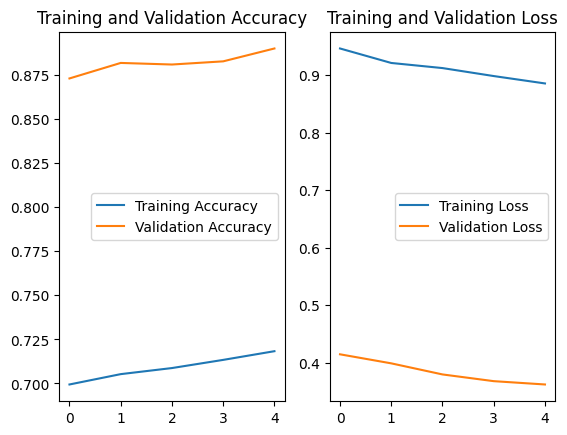

In [8]:
acc = history.history['sparse_categorical_accuracy']
val_acc = history.history['val_sparse_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()